In [2]:
# Dependencies
import tweepy
import numpy as np
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [3]:
# Target Account
target_user = ["@BBCBreaking", "@CBSNews", "@cnnbrk","@FoxNews","@nytimes"]

# Variables for holding sentiments
sentiments = []

# Loop through each user
for user in target_user:
    
    counter = 1
    oldest_tweet = None
    # Get all tweets from home feed
    public_tweets = api.user_timeline(user, max_id = oldest_tweet, count=100)

    # Loop through all tweets 
    for tweet in public_tweets:

            # Run Vader Analysis on each tweet
            results = analyzer.polarity_scores(tweet["text"])
            compound = results["compound"]
            pos = results["pos"]
            neu = results["neu"]
            neg = results["neg"]
            
            # Get Tweet ID, subtract 1, and assign to oldest_tweet
            oldest_tweet = tweet['id'] - 1
        
            # Add sentiments for each tweet into a list
            sentiments.append({"Account": user,
            "Date": tweet["created_at"], 
                           "Compound": compound,
                           "Positive": pos,
                           "Negative": neg,
                           "Neutral": neu,
                           "Tweets Ago": counter})
        
            # Add to counter 
            counter = counter + 1

In [4]:
# Convert sentiments to DataFrame
sentiments_pd = pd.DataFrame.from_dict(sentiments)

#Export the dataframe to csv
sentiments_pd.to_csv("sentiments_pd.csv", index=False, header=True)

sentiments_pd.head()

,Account,Compound,Date,Negative,Neutral,Positive,Tweets Ago
0,@BBCBreaking,-0.2732,Thu Oct 04 13:44:07 +0000 2018,0.116,0.884,0.000,1
1,@BBCBreaking,-0.2960,Thu Oct 04 13:23:18 +0000 2018,0.231,0.630,0.139,2
2,@BBCBreaking,-0.3612,Thu Oct 04 10:08:57 +0000 2018,0.241,0.640,0.118,3
3,@BBCBreaking,-0.8834,Wed Oct 03 15:59:12 +0000 2018,0.408,0.549,0.043,4
4,@BBCBreaking,-0.8316,Wed Oct 03 15:38:53 +0000 2018,0.423,0.577,0.000,5


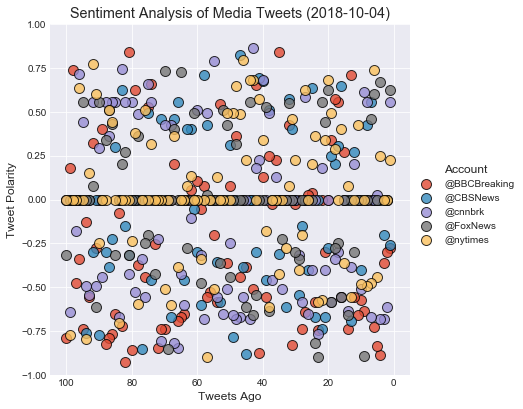

In [22]:
# Using Seaborn to build plot 
sns.set_style(style="darkgrid",rc=None)
g = sns.lmplot(x="Tweets Ago", y="Compound", data= sentiments_pd, hue = "Account", fit_reg = False,size=6, aspect=1, markers='o',scatter = True
, scatter_kws={"s": 100,"edgecolor":"black"})
g.set_axis_labels("Tweets Ago", "Tweet Polarity")
# Using datatime
now = datetime.now()
now = now.strftime("%Y-%m-%d")
plt.title(f"Sentiment Analysis of Media Tweets ({now})")

# limits
plt.xlim(105,-5)
plt.ylim(-1,1)

plt.gcf().subplots_adjust(top=0.9) #adjusting the figure
plt.savefig("Sentiment Analysis of Media Tweets")
plt.show()

In [27]:
# Getting the value for the bar graph
account_group = sentiments_pd.groupby('Account')
avg_score = account_group["Compound"].mean()
sources = sentiments_pd['Account'].unique()

Account
@BBCBreaking   -0.195731
@CBSNews       -0.041482
@FoxNews       -0.008277
@cnnbrk        -0.098490
@nytimes        0.036507
Name: Compound, dtype: float64

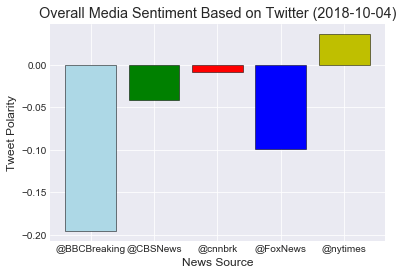

In [34]:
# Bar chart properties
plt.title(f"Overall Media Sentiment Based on Twitter ({now})")
plt.xlabel("News Source")
plt.ylabel("Tweet Polarity")
bars = plt.bar(sources, avg_score, align="center",edgecolor="black")
bars[0].set_facecolor('lightblue')
bars[1].set_facecolor('g')
bars[2].set_facecolor('r')
bars[3].set_facecolor('b')
bars[4].set_facecolor('y')
plt.savefig("Overall Media Sentiment Based on Twitter.png")
plt.show()

# Observable Trends
1. Each news account has its own style of reporting news 
2. News are not always being reported in a neutral tone. 
3. The past week, @BBCBreaking and @nytimes had reported a few of the same information, but due to the wording, their average compound scores have a huge difference.